In [1]:
import numpy as np
import os
import skimage.io as skio
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
indir = "G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project"

# set the filepath
filtered_patches_path = os.path.join(indir, "final_patches_w_augmentation")

In [3]:
filtered_patches_path

'G:/.shortcut-targets-by-id/1w3kIfvkBH_Xa1G856qbgk-8u0IRdcwZ3/MUSA 650 Final Project\\final_patches_w_augmentation'

In [4]:
patches = np.load(os.path.join(filtered_patches_path, "final_patches_w_augmentation.npy"))

In [5]:
patches.shape

(25000, 256, 256, 3)

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# Normalize the images
patches = patches.astype('float32') / 255.

C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [ ]:
from tqdm import tqdm
import cv2

# Define batch size
batch_size = 32

# Use KMeans clustering to generate pseudo-labels in batches
num_clusters = 3
pseudo_labels = np.zeros((len(patches), 256, 256), dtype=np.int32)
for i in tqdm(range(0, len(patches), batch_size)):
    batch_patches = patches[i:i+batch_size]
    batch_size_actual = batch_patches.shape[0]

    # Reshape the batch patches to a 2D array of shape (batch_size_actual * 256 * 256, 3)
    patch = batch_patches.reshape(batch_size_actual * 256 * 256, 3)

    # Convert the data type to np.float32
    patch = patch.astype(np.float32)

    # Use KMeans clustering to generate pseudo-labels for the batch
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    batch_pseudo_labels = kmeans.fit_predict(patch).reshape(batch_size_actual, 256, 256)

    # Store the batch pseudo-labels in the overall pseudo-labels array
    pseudo_labels[i:i+batch_size_actual] = batch_pseudo_labels

# Convert the pseudo-labels to one-hot encoding
pseudo_labels_onehot = tf.one_hot(pseudo_labels, num_clusters).numpy()

C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nissim\AppData\Local\R-MINI~1\envs\remote-sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

KeyboardInterrupt: 

In [15]:
# check if the gpu is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
# Convert the pseudo-labels to one-hot encoding
pseudo_labels_onehot = tf.one_hot(pseudo_labels, num_clusters).numpy()

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [10]:
pseudo_labels.shape

(25000, 256, 256)

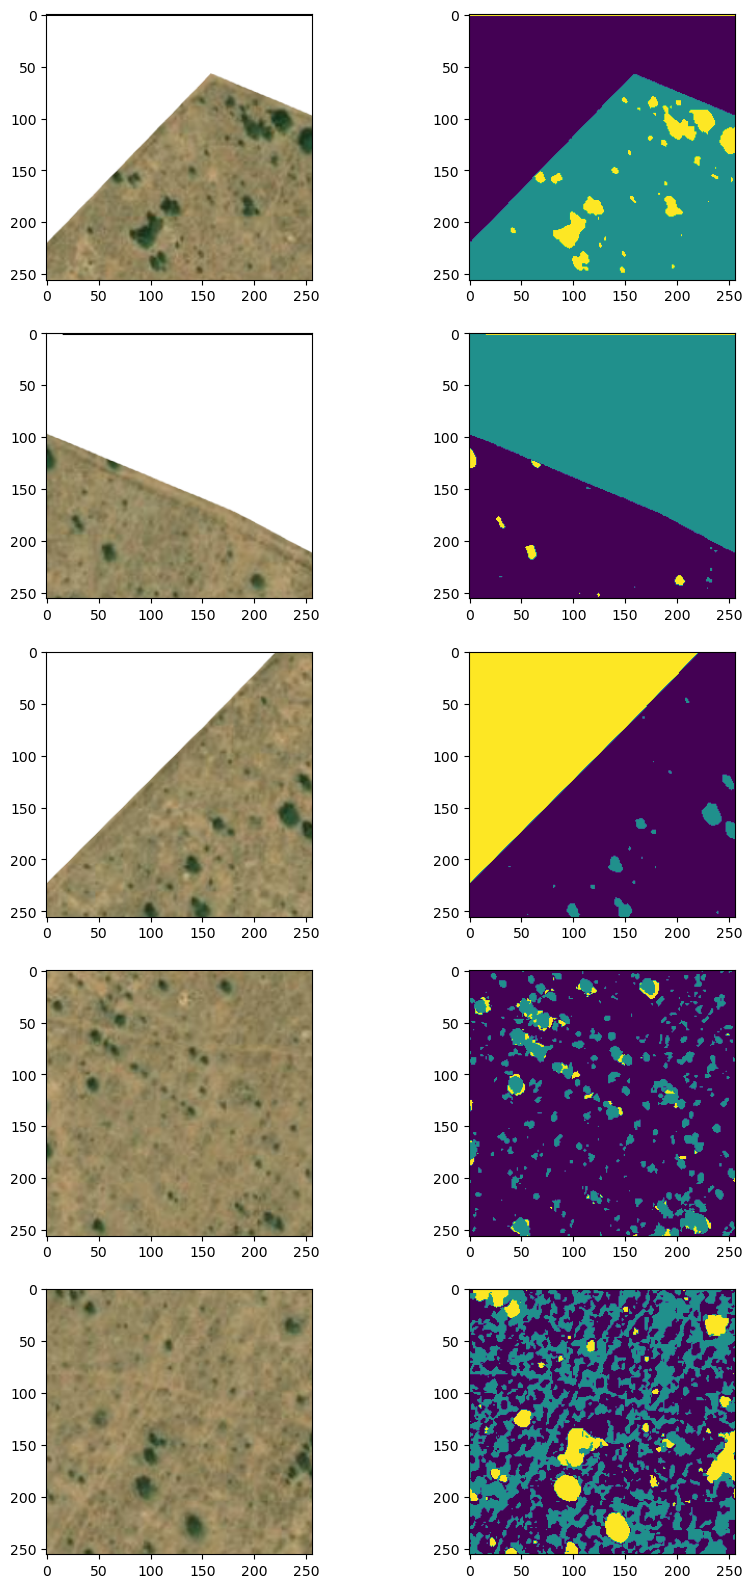

In [11]:
# print 5 patches and their corresponding pseudo-labels
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i in range(5):
    ax[i, 0].imshow(patches[i])
    ax[i, 1].imshow(pseudo_labels[i])
plt.show()

In [12]:
# split the patches into train, validation, and test sets with a 40:30:30 ratio
train_size = int(0.4 * len(patches))
val_size = int(0.3 * len(patches))
test_size = int(0.3 * len(patches))

train_patches = patches[:train_size]
train_labels = pseudo_labels_onehot[:train_size]

val_patches = patches[train_size:train_size+val_size]
val_labels = pseudo_labels_onehot[train_size:train_size+val_size]

test_patches = patches[train_size+val_size:]
test_labels = pseudo_labels_onehot[train_size+val_size:]

print("train_patches.shape: {}".format(train_patches.shape))
print("train_labels.shape: {}".format(train_labels.shape))
print("val_patches.shape: {}".format(val_patches.shape))
print("val_labels.shape: {}".format(val_labels.shape))
print("test_patches.shape: {}".format(test_patches.shape))
print("test_labels.shape: {}".format(test_labels.shape))

NameError: name 'pseudo_labels_onehot' is not defined

In [ ]:
# Define the UNet architecture
inputs = Input(shape=(256, 256, 3))

conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
merge6 = concatenate([drop4, up6], axis=3)
conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
merge7 = concatenate([conv3, up7], axis=3)
conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
merge8 = concatenate([conv2, up8], axis=3)
conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
merge9 = concatenate([conv1, up9], axis=3)
conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
conv9 = Conv2D(num_clusters, 3, activation='softmax', padding='same')(conv9)

#Define the model
model = Model(inputs=inputs, outputs=conv9)

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(patches, pseudo_labels_onehot, epochs=10, batch_size=16)

#Make predictions on some new patches
new_patches = np.load("path/to/new_patches.npy")
new_patches = new_patches.astype('float32') / 255.
new_predictions = model.predict(new_patches)

#Convert the predictions to labels
new_labels = np.argmax(new_predictions, axis=-1)